<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Random Search로 Decision Tree 알고리즘 모델을 튜닝합니다.


# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/income_happy.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [4]:
# 기초통계량 확인
data.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [5]:
# target 확인
target = 'happiness'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

In [6]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [7]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [8]:
# 선언하기
model = DecisionTreeRegressor(max_depth=5, random_state=2022)

In [9]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=2022)

In [10]:
# 예측하기
y_pred = model.predict(x_test)

In [11]:
# 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 0.6072155238529675
R2-Score: 0.7169483336378495


In [12]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

**성능에 대한 고민**

- 위 모델링 과정에서 max_depth=5를 지정했습니다.
- max_depth를 다른 값으로 지정하면 성능이 더 좋을 수도 있습니다.
- max_depth 외에도 성능에 영향을 주는 파라미터가 더 있을 것입니다.
- 경험이 없는 상태에서 최적의 파라미터를 지정하기는 쉽지 않습니다.


# 5.성능 튜닝


- Random Search로 튜닝을 진행합니다. 


**1) 모델링 & 튜닝**

- 성능을 확인할 파라미터를 딕셔너리 형태로 선언합니다.

In [13]:
# 파라미터 선언
  # max_depth: 1~50

# rand_param = {'max_depth':range(1,51), 
#              'min_samples_leaf':range(1, 21)}
rand_param = {'max_depth':range(1,51)}

- 사용할 라이브러리를 불러옵니다.

In [14]:
# 불러오기

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

- 다음 두 가지 모델을 선언합니다.
    - 기본 모델: 기본 알고리즘을 사용하는 튜닝 대상 모델
    - 최종 모델: RandomizedSearchCV 알고리즘을 사용하는 모델
- 다음 정보를 최종 모델에 파라미터로 전달합니다.
    - 기본 모델 이름
    - 파라미터 변수
    - cv: K-Fold 분할 개수(기본값=5)
    - n_iter: 시도 횟수(기본값=10)
    - scoring: 평가 방법

In [15]:
# 선언하기
model_dst = DecisionTreeRegressor(random_state=2022)

# Random Search 선언
  # cv=10
  # n_iter=20
  # scoring='r2'
model = RandomizedSearchCV(model_dst,     # 기본 모델
                           rand_param,    # 파라미터 변수
                           cv=10,         # cv값 (K-Fold Cross Validation의 분할 수)
                           n_iter=20,     # 반복 횟수
                           scoring='r2',  # 성능 기준
                           n_jobs=-1)     # cpu 가속화

In [16]:
model_dst.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [17]:
# 학습하기

model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=2022),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': range(1, 51)},
                   scoring='r2')

**2) 결과 확인**

- model.cv_results_ 속성에 성능 테스트와 관련된 많은 정보가 포함되어 있습니다.

In [18]:
# 관련 정보들
model.cv_results_

{'mean_fit_time': array([0.01296434, 0.00770569, 0.00900192, 0.00628171, 0.00618336,
        0.00598366, 0.00728033, 0.0084774 , 0.00867705, 0.00668273,
        0.00767906, 0.01176891, 0.00608311, 0.0066823 , 0.00737901,
        0.00628271, 0.00618339, 0.00638256, 0.00598445, 0.00642686]),
 'std_fit_time': array([0.00896551, 0.00140739, 0.00260906, 0.0013421 , 0.00107414,
        0.00077272, 0.00178831, 0.00569839, 0.00746411, 0.00118405,
        0.00448413, 0.01706437, 0.00113236, 0.00118477, 0.00185098,
        0.00063836, 0.00107422, 0.00195389, 0.00044574, 0.0017465 ]),
 'mean_score_time': array([0.00627282, 0.00469565, 0.0050046 , 0.00488834, 0.00458794,
        0.00418894, 0.00498629, 0.00458755, 0.00468676, 0.00438728,
        0.00548487, 0.00408814, 0.0041889 , 0.00538542, 0.00598388,
        0.00498667, 0.00428843, 0.00418851, 0.00398982, 0.00459547]),
 'std_score_time': array([0.00233334, 0.00147783, 0.00136208, 0.00151102, 0.00119714,
        0.00074666, 0.00099883, 0.00111 

- 이 중 중요한 정보를만 추출해서 확인합니다.
- 다음 3가지는 꼭 기억해야 합니다.
    - model.cv_results_['mean_test_score']: 테스트로 얻은 성능
    - model.best_params_: 최적의 파라미터
    - model.best_score_: 최고의 성능

In [19]:
# 중요 정보 확인
print('=' * 70)
print(model.cv_results_['param_max_depth'].data)
print('-' * 70)
print(model.cv_results_['mean_test_score'])
print('-' * 70)
print('최적파라미터:', model.best_params_)
print('-' * 70)
print('최고성능:', model.best_score_)
print('=' * 70)

[50 15 18 23 40 14 1 47 20 19 33 9 36 34 21 24 48 49 32 5]
----------------------------------------------------------------------
[0.40721493 0.42189138 0.40746404 0.40721493 0.40721493 0.43106702
 0.53002965 0.40721493 0.40771056 0.40760415 0.40721493 0.4915473
 0.40721493 0.40721493 0.4076518  0.40721493 0.40721493 0.40721493
 0.40721493 0.61175096]
----------------------------------------------------------------------
최적파라미터: {'max_depth': 5}
----------------------------------------------------------------------
최고성능: 0.6117509619179523


- 성능 정보를 시각화해 파라미터에 따른 성능 변화를 확인합니다.

{'max_depth': 5}


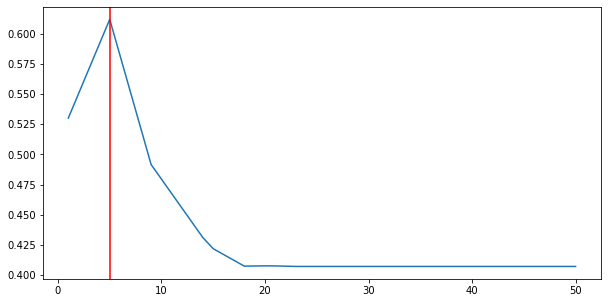

In [20]:
# 데이터프레임으로 변환
tmp = pd.DataFrame()
tmp['depth'] = model.cv_results_['param_max_depth'].data
tmp['score'] = model.cv_results_['mean_test_score']
tmp.sort_values(by='depth', ascending=True, inplace=True)
print(model.best_params_)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(tmp['depth'], tmp['score'])
plt.axvline(model.best_params_['max_depth'], color='r')
plt.show()

**3) 예측과 평가**

- 학습을 통해 예상한 성능과 실제 평가에 따른 성능은 차이가 있을 수 있습니다.
- 예선전에서 성적이 좋았다고 본선에서도 성적이 좋다고 보장할 수 없는 없겠지요?

In [21]:
# 예측하기

y_pred = model.predict(x_test)

In [22]:
# 평가하기

print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2 Score :', r2_score(y_test, y_pred))

MAE : 0.6072155238529675
R2 Score : 0.7169483336378495
